**Unsupervised Learning** (Nazoratsiz)

Ishlatilishi:

**Klasterlash** (guruhlash)

• Tavsiya tizimlari

• Yo'naltirilgan marketing

• Mijozlarni guruhlash

**Ma'lumot o'chamini kamaytirish (5D→2D)**

• Katta ma'lumotlarni vizualizasiya qilish

• Paramterlarni jamlash

• Ma'lumotlarni siqish

**Qonuniyatlarni topish**

**Anomal (noodatiy) qiymatlarni aniqlash**

In [17]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

n_samples - nuqtalar soni

centers - klasterlar markazi (sentroid) koordinatalari

-cluster_std - markazdan standart og'ish


In [2]:
np.random.seed(0)
centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

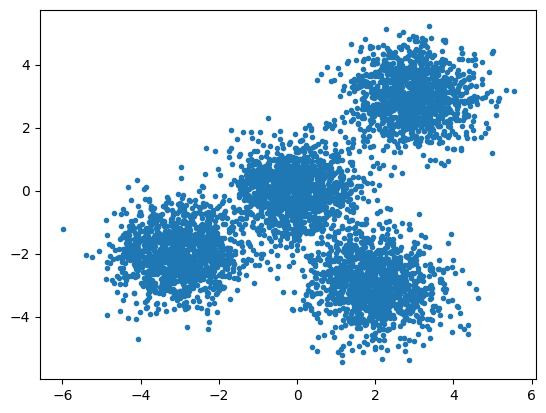

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

## **k-means algoritmi**

KMeans funksiyasi quyidagi parametrlarni qabul qiladi:

init - sentrodilarni tanlash usuli (k-means++ yoki random)

n_clusters - klastertlar soni

n_init - algoritmni necha marta ishga tushirish (turli sentroidlar bilan qayta-qayta ishga tushirib, modelni qurishni boshlash uchun eng yaxshi sentroidlar tanlanadi)


k-means algoritmi

◦	Har bir klaster uchun tasodifiy sentroidlarni tanlash
◦
◦	Har bir nuqtadan sentroidgacha masofani o'Ichash
◦
◦	Har bir nuqtani eng yaqin sentroidga biriktirish
◦
◦	Sentroidlarni siljitish
◦
◦	2-4 qadamlarni setroidlar siljishi to'tagunga qadar takrorlash



In [10]:
k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 15)

In [11]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=15)

In [31]:
# Saqlangan rasmni ochish
from IPython.display import Image
Image(url='https://www.researchgate.net/profile/Mahesh-Sarathchandra/publication/344888655/figure/fig1/AS:950914114408448@1603727000307/k-means-objective-function.ppm',height=200)

# Xatolikni minimallashtirish formulasi

In [33]:
Image(url='https://miro.medium.com/v2/resize:fit:850/1*9ihLnBj-RV2h4e-VEimEbw.png', height=300)

#Elbow method -> Klasterlar soni k ni qanday tanlaymiz?

In [12]:
k_means.labels_   #Klaster raqamini ko'rish

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

In [13]:
k_means.cluster_centers_  # Klaster markazlarini ko'rish

array([[-1.84840051, -1.14875843],
       [ 2.78117788,  2.80263657],
       [ 1.89467587, -2.7636292 ]])

In [14]:
print(centroids)

print(np.round(k_means.cluster_centers_))

[[3, 3], [-3, -2], [2, -3], [0, 0]]
[[-2. -1.]
 [ 3.  3.]
 [ 2. -3.]]


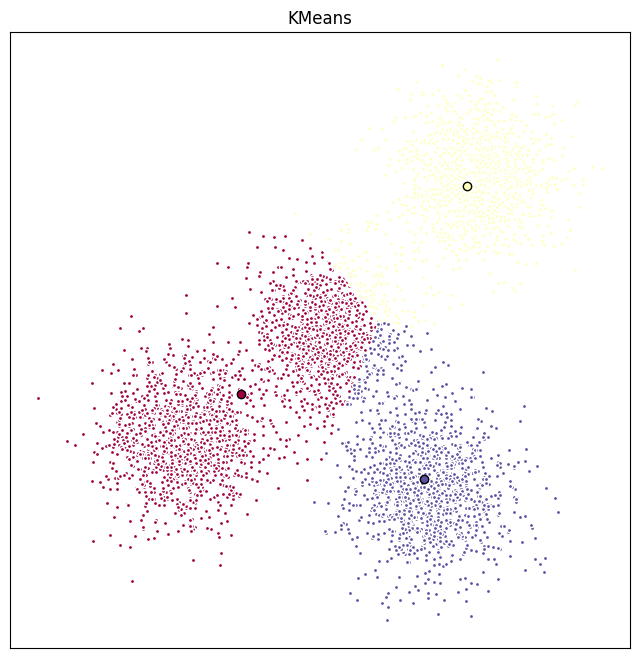

In [15]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [18]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [20]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [21]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [22]:
k = 3
k_means = KMeans(n_clusters = k) # init va n_init standart qiymatlarni qabul qiladi, biz faqat klasterlar sonini ko'rsatdik.
k_means.fit(norm_data)
print(k_means.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 1 0 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2 0 0 0 1 2 2 0 0 0 0 0 0 2 1 0 0 0 1
 1 0 2 1 2 0 2 0 2 0 0 0 0 2 2 1 0 1 1 1 0 0 0 2 0 2 2 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 2 0 0 1 2 0 2 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1
 0 0 0 2 1 0 0 0 0 2 1 1 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 1 2 1 0 0 2 1
 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 2 0 1 0 0 1 0 2 0 1 0 0 0 0 0 1 1 2 0 0 1 2
 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 1 0 1 0
 0 0 2 0 1 2 1 0 2 0 0 1 0 0 0 0 1 1 1 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 1 0 0
 1 0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 2 1
 0 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 0 1 0 0 0 2 2 0
 1 0 2 1 1 0 0 0 1 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0 1 1
 2 0 0 0 0 0 1 1 0 2 1 2 0 0 1 0 0 2 2 0 1 0 0 2 0 1 0 2 0 0 0 2 0 0 0 0 2
 0 1 0 0 0 0 2 1 0 0 2 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 1 0 0 0 1 0
 1 0 0 0 0 0 2 1 1 0 2 0 

In [23]:
df['cluster'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [24]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


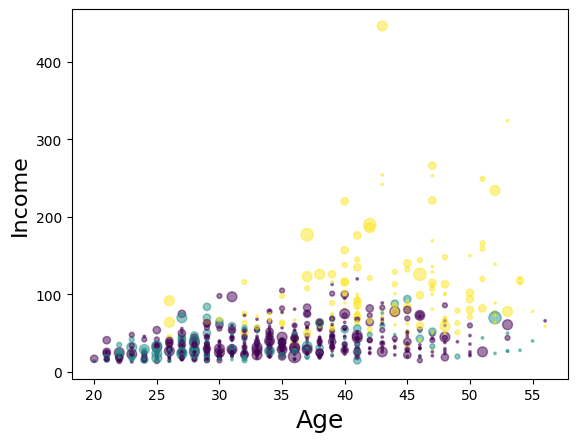

In [25]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

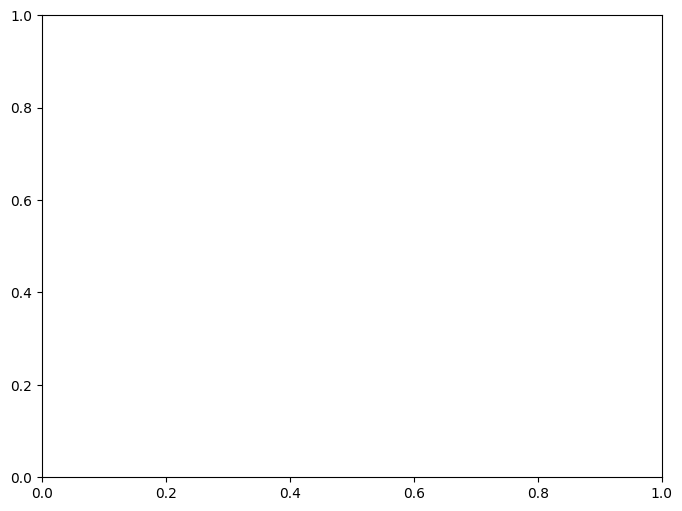

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 2], X[:, 0], X[:, 3], c= k_means.labels_.astype(float))

Afzalligi

Klasterlar sonini belgilash talab qilinmaydi

Oson

Dendogram yordamida ma'lumotni tahlil gilish oson


Kamchiliklari:

Avalgi qadamni bekor qilib bo'lmaydi

Uzoq vaqt oladi

Dendogramdan kerakli klasterlar sonini ajratib olish
murakkab

## **Ierarxik (hierarchical) algoritm**

• lerarxik klasterlash algoritmi klasterlar ierarxiyasini quradi, bunda har bir tugun klaster bo'ladi va o'zidan keying tugun klasterlarini o'z ichiga oladi.

In [36]:
Image(url='https://miro.medium.com/v2/resize:fit:1400/0*afzanWwrDq9vd2g-',height=300)

**Iyerarxik klasterlash qadamlari**

1.Har bir nugtani alohida klaster deb ajratib olamiz

2.Yaqinlik matrisasini quramiz

3.Bir dona klaster qolgunga qadar quidagi gadamlarni takrorlaymiz

     -1. Eng yagin ikki klasterni birlashtirish
      -2.Yaginlik matrisasini yangilash


**Klasterlar o'rtasidagi masofa**

• Single-linkage Clustering ->Klasterlar o'rtasidagi minimum masofa

• Complete-linkage Clustering -> Klasterlar o'rtasidagi maksimum masofa

• Average Linkage clustering -> Klasterlar o'rtasidagi o'rta masofa

• Centroid Linkage clustering -> Klaster markazlari orasidagi masofa

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
df = pd.read_csv(url)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [39]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce') # raqamli ustunga aylantirish
df = df.dropna()
df = df.reset_index(drop=True) # indexni tashlab yuborish
df.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [40]:
# Klasterlash uchun ustunlarni tanlab olamiz.
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [41]:
# Normalizasiya
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Ierarxik klasterlash uchun `Scipy` paketidan foydalanmiz.

Boshlanishiga distance matrix `D` (masofalar matrisasini) quramiz:

In [42]:
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [43]:
# training
Z = hierarchy.linkage(D)

<ipython-input-43-4544e7d00191>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D)


**Dendogram**

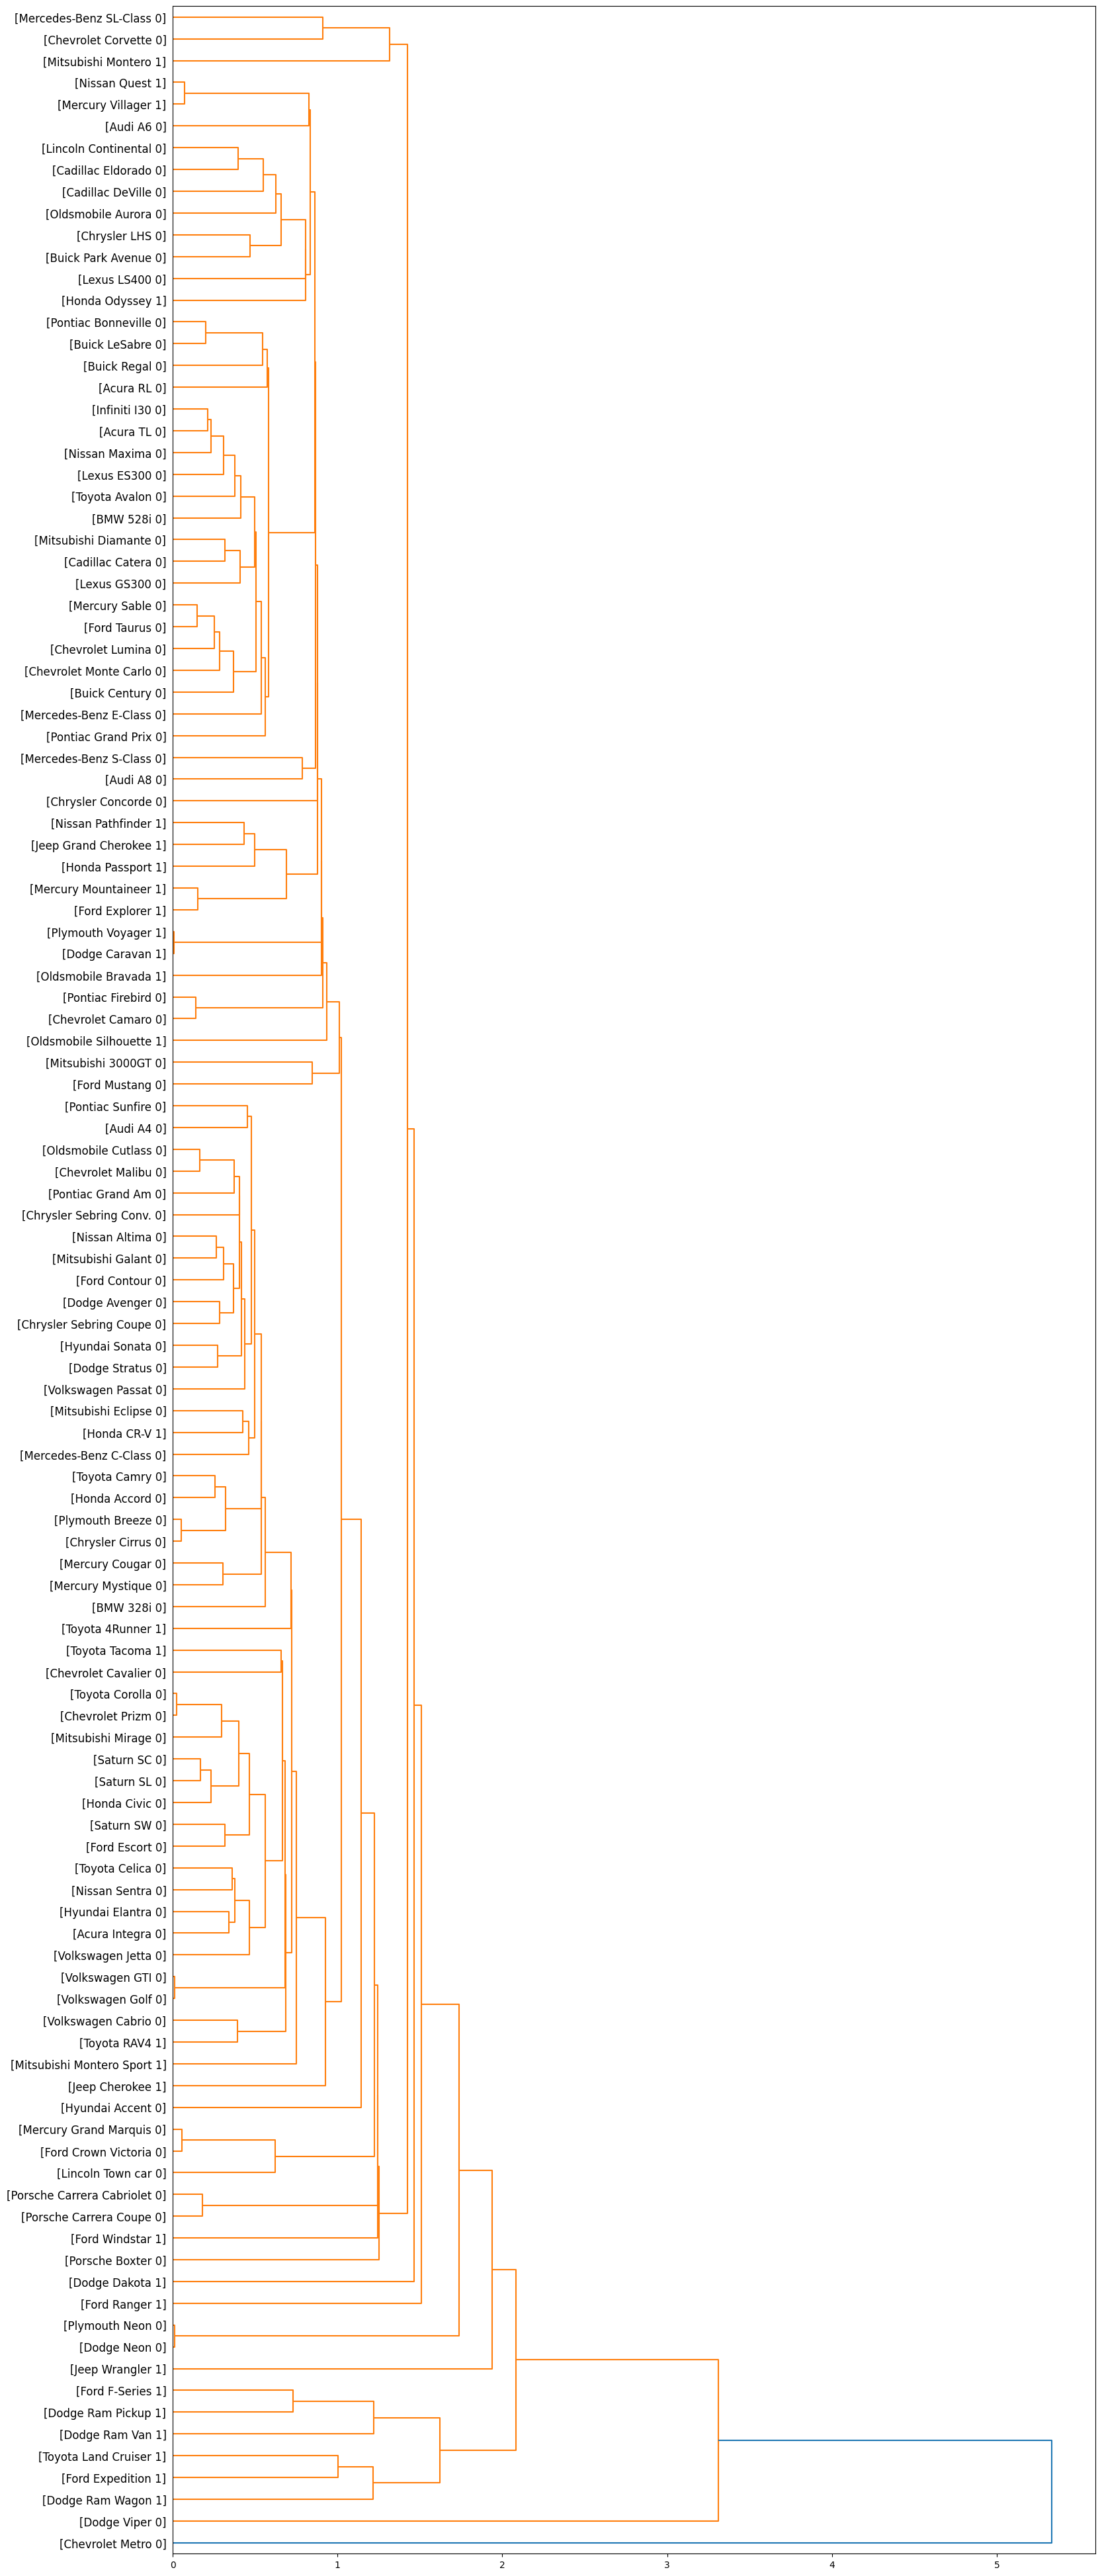

In [45]:
fig = plt.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [46]:
from scipy.cluster.hierarchy import fcluster
k = 5 # 5 ta klaster
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

**scikit** yordamida klasterlash

In [47]:
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

In [49]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(D)

agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

**k-means**

Tez, katta datasetlarda qo'llash mumkin

Klasterlar sonini oldindan ko'rsatish kerak

Faqatgina bitta variant beradi

Sentroidlarni tasodifiy tanlash evaziga har doim har xil
natija qaytadi


**lyerarxik algoritm**

Sekin, katta datasetlarda hisob-kitob uzoq vaqt oladi

Klasterlar soni talab qilinmaydi

Dendogramdan klasterlar sonini o'zgartirishimiz
mumkin

Har doim bir xil klasterlarni qaytaradi

## **DBSCAN** --> Densitiy-Based Spatial Clustering of Application with Noise

• Eng ko'p qo'llaniladigan algoritm

• Asosiy g'oya: Biror nuqta klasterga tegishli bo'lsa bu
nuqta atrofida klasterga tegishli boshqa ko'plab nuqtalar
bo'lishi kerak

**• Asosiy parametrlari:**

• R (qo'shni nuqtalargacha radius) - berilgan radisudagi
qo'shnilar soni

• M (minimum qo'shnilar soni) - klaster shakllantirish
uchun minimum nuqtalar soni

**Avzalliklari:**

◦	Istalgan shakldagi klasterlarni aniqlaydi

◦	Shovginga sezgir va noodatiy qiymatlarni ajrata oladi

◦	Klasterlar sonini ko'rsatish talab qilinmaydi


k-means noodatiy giymatlarni ham klasterga biriktiradi

DBSCAN Zichlik asosidagi algoritmlar zich joylashgan hududlarni birlashtirib, noodatiy qiymatlarni ajratib beradi


In [51]:
Image(url='https://miro.medium.com/v2/resize:fit:1358/1*KqWII7sFp1JL0EXwJGpqFw.png',height=300)

Nuqtalar 3 turli bo'lishi mumkin:
- Core (markaz)
- Border (chegara)
- Outlier (noodatiy)

DBSCAN maqsadi:

• har bir nuqtani tahlil qilish va yuqoridagi turlardan biriga
ajratish

• Nuqtalarni klasterlarga ajratish

**Klaster:** Barcha go'shni Markaz nuqtalar va ularga tegishli Chegara nuqtalar.

**Core point:**

  R radiusda kamida M nuqta bilan tutashgan nuqta.

**Border point:**

  M dan kam nuqtalar bilan tutash yoki Core point bilan qo'shni.

**Outlier point:**

  Markaz yoki Chegara bo’magan nuqta.
